In [1]:
#import standard data sci libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ! pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [2]:
df = pd.read_csv('Maharasthra.csv')

In [3]:
df.columns

Index(['From Date', 'To Date', 'Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5',
       'State', 'City', 'Station', 'AQI', 'AQI Category'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48180 entries, 0 to 48179
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   From Date     48180 non-null  object 
 1   To Date       48180 non-null  object 
 2   Ozone         16888 non-null  float64
 3   CO            17931 non-null  float64
 4   SO2           18083 non-null  float64
 5   NO2           18250 non-null  float64
 6   PM10          17973 non-null  float64
 7   PM2.5         17437 non-null  float64
 8   State         48180 non-null  object 
 9   City          48180 non-null  object 
 10  Station       48180 non-null  object 
 11  AQI           18793 non-null  float64
 12  AQI Category  18793 non-null  object 
dtypes: float64(7), object(6)
memory usage: 4.8+ MB


In [5]:
df.isnull().sum()

From Date           0
To Date             0
Ozone           31292
CO              30249
SO2             30097
NO2             29930
PM10            30207
PM2.5           30743
State               0
City                0
Station             0
AQI             29387
AQI Category    29387
dtype: int64

In [6]:
df.describe()

,Ozone,CO,SO2,NO2,PM10,PM2.5,AQI
count,16888.000000,17931.000000,18083.000000,18250.000000,17973.000000,17437.000000,18793.000000
mean,28.211884,0.982403,17.478782,28.206803,107.317096,45.407580,113.967754
std,22.795631,0.716821,22.873152,39.941811,79.016463,40.720815,79.210243
min,0.010000,0.000000,0.010000,0.010000,0.170000,0.050000,0.000000
25%,11.140000,0.450000,5.020000,9.490000,49.690000,18.100000,57.000000
50%,23.250000,0.840000,11.040000,18.370000,86.800000,34.160000,94.000000
75%,40.270000,1.300000,21.600000,34.040000,148.450000,62.540000,148.000000
max,187.170000,9.230000,197.780000,500.000000,1000.000000,833.800000,500.000000


In [7]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

df.head()

['From Date', 'To Date', 'Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5', 'State', 'City', 'Station', 'AQI', 'AQI Category']
Index(['from_date', 'to_date', 'ozone', 'co', 'so2', 'no2', 'pm10', 'pm2.5',
       'state', 'city', 'station', 'aqi', 'aqi_category'],
      dtype='object')


,from_date,to_date,ozone,co,so2,no2,pm10,pm2.5,state,city,station,aqi,aqi_category
0,01-08-2021 00:00,02-08-2021 00:00,NaN,NaN,NaN,6.31,NaN,14.08,Maharashtra,Mumbai,"Powai, Mumbai - MPCB",23.0,Good
1,02-08-2021 00:00,03-08-2021 00:00,20.13,0.64,2.18,8.92,46.17,14.33,Maharashtra,Mumbai,"Powai, Mumbai - MPCB",46.0,Good
2,03-08-2021 00:00,04-08-2021 00:00,16.45,0.62,2.35,7.26,34.67,11.63,Maharashtra,Mumbai,"Powai, Mumbai - MPCB",35.0,Good
3,04-08-2021 00:00,05-08-2021 00:00,15.61,0.61,2.31,6.92,47.70,15.29,Maharashtra,Mumbai,"Powai, Mumbai - MPCB",48.0,Good
4,05-08-2021 00:00,06-08-2021 00:00,21.13,0.66,2.48,6.78,60.44,17.58,Maharashtra,Mumbai,"Powai, Mumbai - MPCB",60.0,Moderate


In [8]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 13 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
ozone,31292,64.900000
pm2.5,30743,63.800000
co,30249,62.800000
pm10,30207,62.700000
so2,30097,62.500000
no2,29930,62.100000
aqi,29387,61.000000
aqi_category,29387,61.000000


In [9]:
city_day = df.copy()

In [10]:
city_day['Particulate_Matter'] = city_day['pm2.5']+city_day['pm10']

In [11]:
pollutants = ['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']

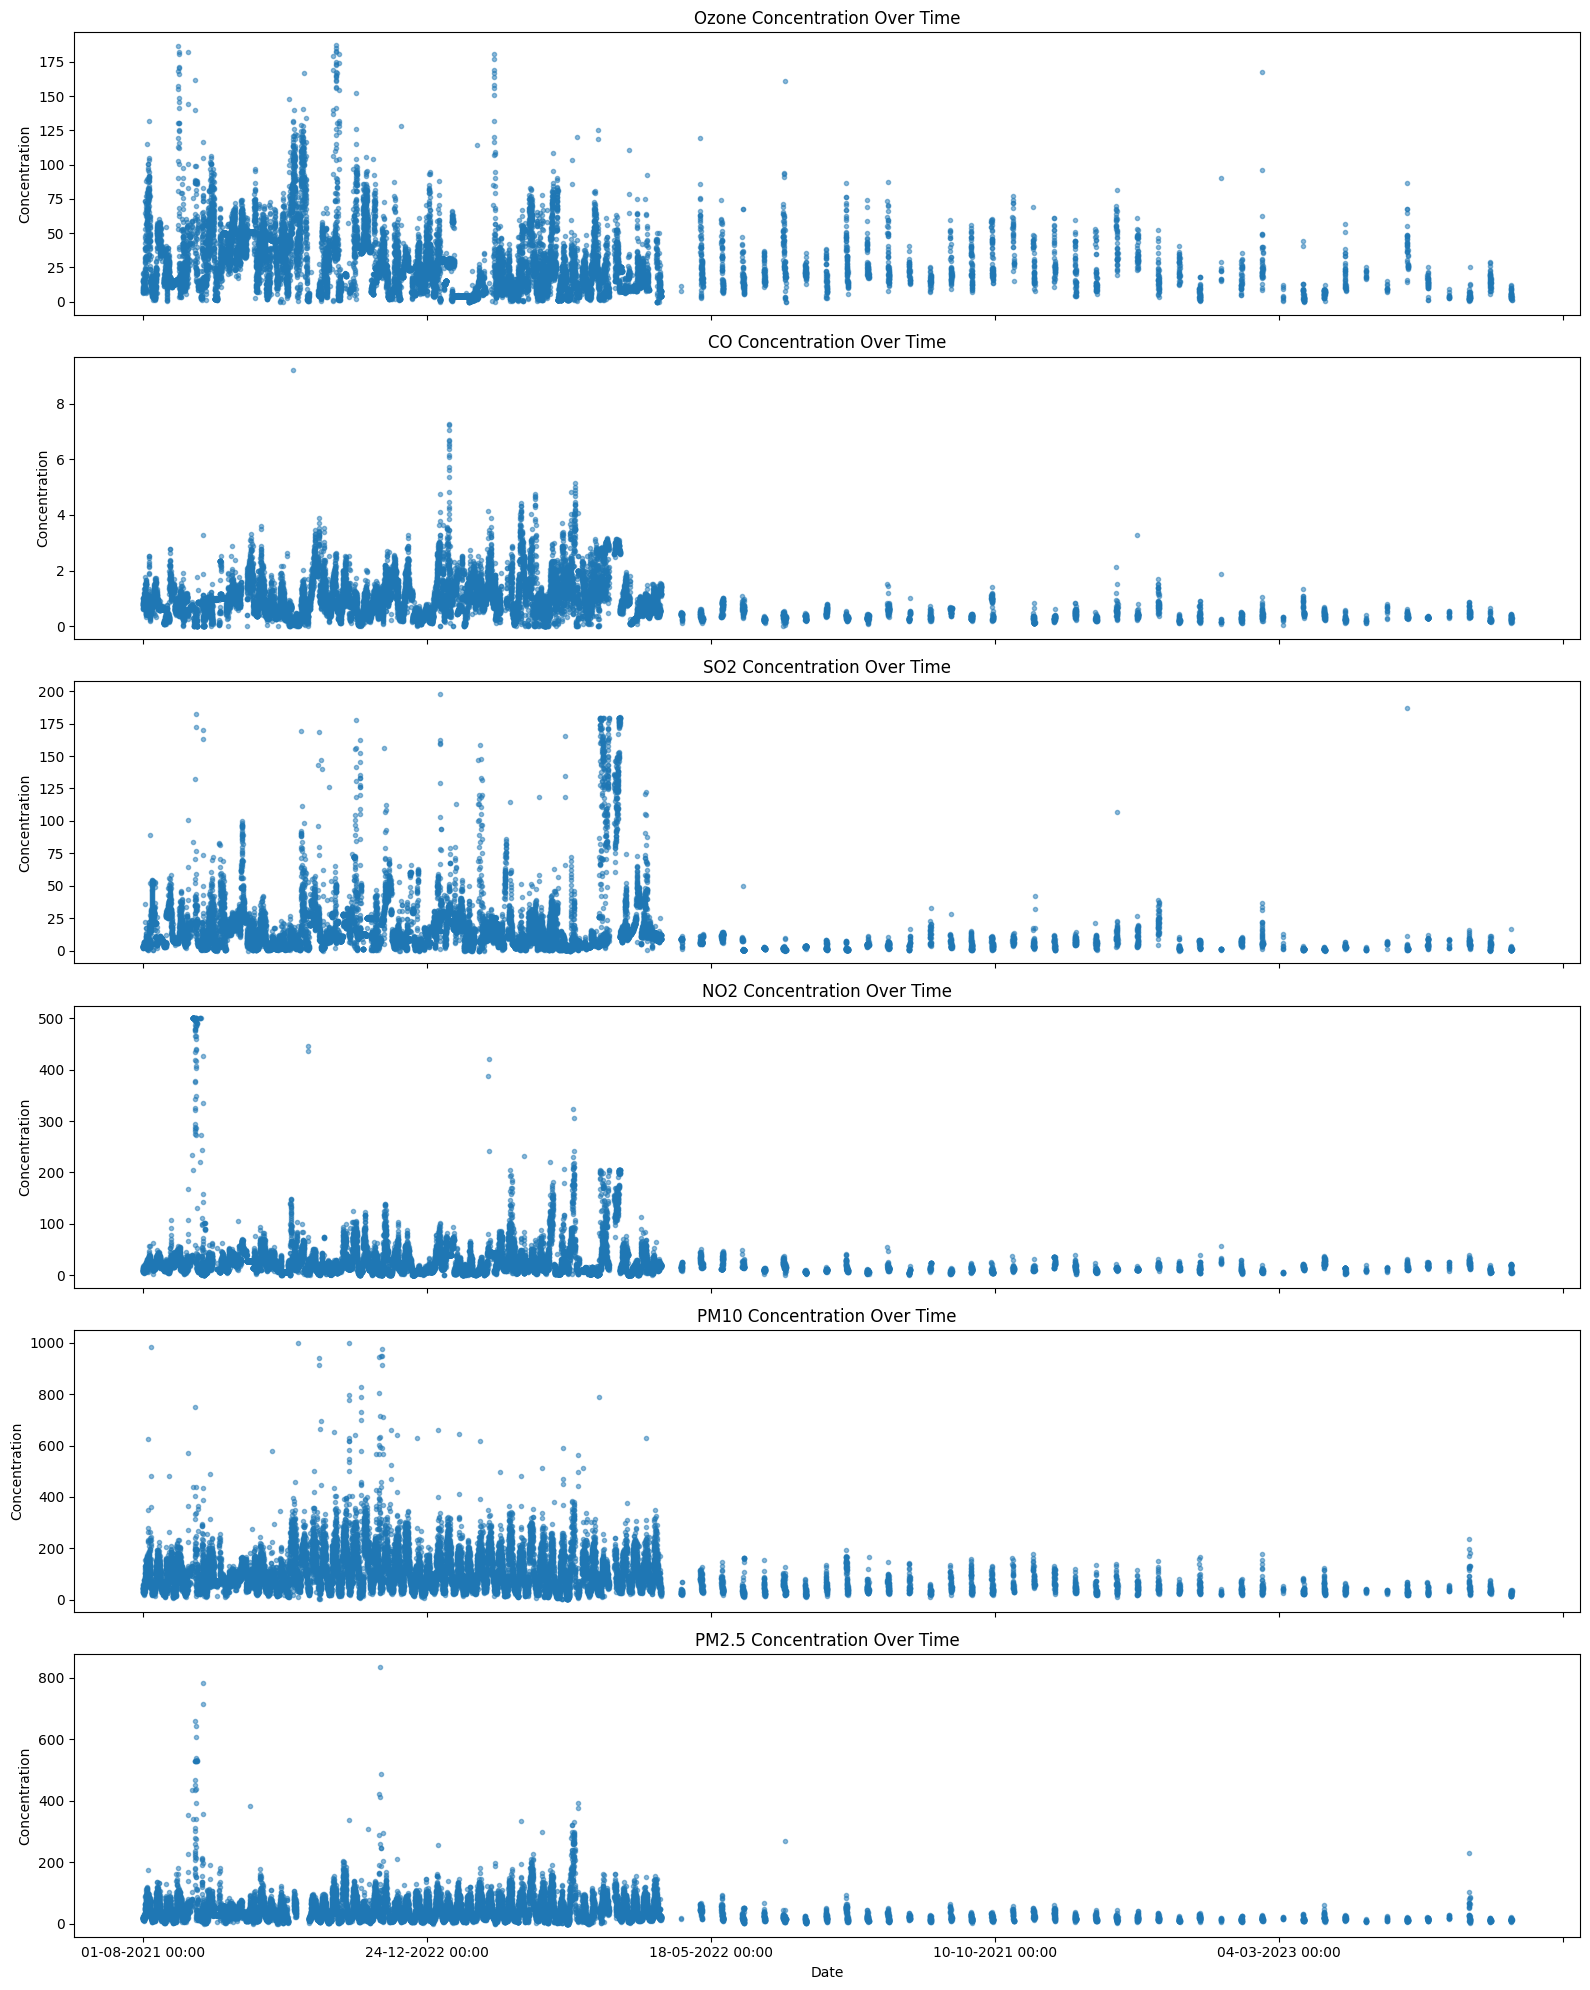

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. RELOAD THE DATA to ensure the column exists
df = pd.read_csv("Maharasthra.csv")


df.set_index('From Date', inplace=True)

fig, axes = plt.subplots(len(pollutants), 1, figsize=(16, 20), sharex=True)

for i, pollutant in enumerate(pollutants):
    df[pollutant].plot(
        ax=axes[i],
        marker='.', 
        alpha=0.5, 
        linestyle='None',
        title=f'{pollutant} Concentration Over Time'
    )
    
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Concentration') 

plt.tight_layout()
plt.show()

In [13]:
#source: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.display import display_html
# def display_side_by_side(*args):
#     html_str=''
#     for df in args:
#         html_str+=df.render()
#     display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
def display_side_by_side(*args):
    """
    Displays Pandas Styler objects side-by-side by converting them to HTML.
    """
    html_str = ''
    
    # *** CHANGE THIS LINE ***
    for df in args:
        html_str += df.to_html() # Use .to_html() instead of .render()
        
    # The replacement is to ensure the tables are displayed inline, not stacked.
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [14]:
def max_polluted_city(pollutant):
    x1 = city_day[[pollutant, 'city']].groupby('city').mean().sort_values(by=pollutant, ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant], 2)
    return x1.head(10).style.background_gradient(cmap='OrRd')

In [15]:
pollutants = ['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']

pm2_5 = max_polluted_city('pm2.5')
pm10 = max_polluted_city('pm10')
no2 = max_polluted_city('no2')
so2 = max_polluted_city('so2')
co = max_polluted_city('co')
ozone = max_polluted_city('ozone')


display_side_by_side(pm2_5, pm10, no2, so2, co, ozone)

,city,pm2.5
0,Pune,64.180000
1,Navi Mumbai,54.540000
2,Kalyan,52.280000
3,Mumbai,45.530000
4,Chandrapur,45.440000
5,Nagpur,40.570000
6,Thane,38.700000
7,Pimpri-Chinchwad,38.270000
8,Bhiwandi,37.390000
9,Solapur,35.720000


In [16]:
df1 = df.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['Ozone']=df1['Ozone'].fillna((df1['Ozone'].median()))

In [17]:
df1['Pollution content'] = df1['PM2.5']+df1['PM10']+df1['NO2']+df1['CO']+df1['SO2']+df1['Ozone']

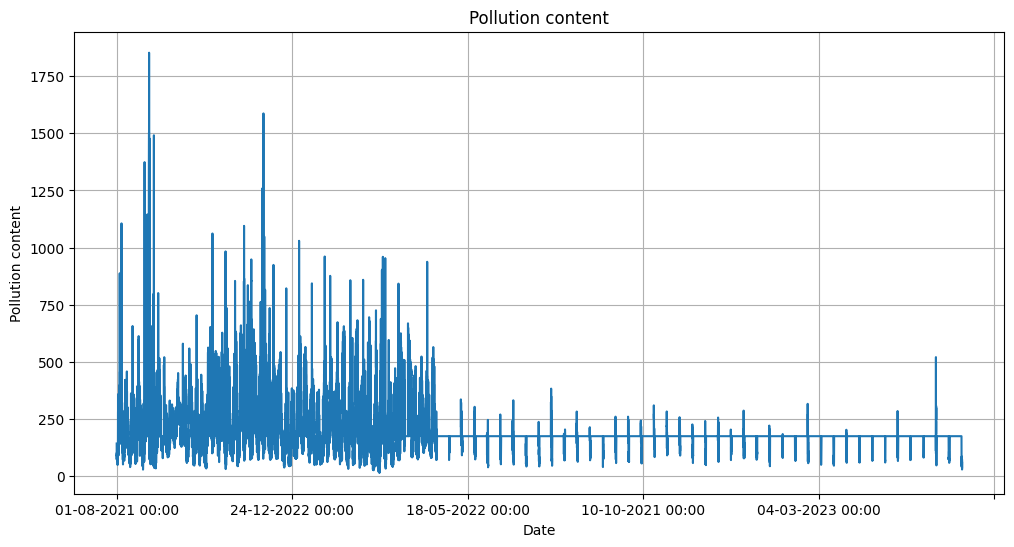

In [18]:
import matplotlib.pyplot as plt

def ploting(var):
    # Correction: Replace the problematic iplot call with standard pandas.plot(),
    # which uses matplotlib for stability.
    ax = df1[var].plot(figsize=(12, 6), title=var)
    
    # Set labels using the standard matplotlib Axis methods
    ax.set_xlabel('Date')
    ax.set_ylabel(var)
    plt.grid(True)
    plt.show()

ploting('Pollution content')

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1. Load Dataset
# ---------------------------
df = pd.read_csv('Maharasthra.csv')
# df['From Date'] = pd.to_datetime(df['From Date'], format='%Y-%m-%d')

# Preserve 'From Date' as a column
# df.set_index('From Date', inplace=False)

# ---------------------------
# 2. AQI Calculation
# ---------------------------
breakpoints = {
    'PM2.5': [(0,50,0,30),(51,100,31,60),(101,200,61,90),(201,300,91,120),(301,400,121,250),(401,500,251,500)],
    'PM10': [(0,50,0,50),(51,100,51,100),(101,200,101,250),(201,300,251,350),(301,400,351,430),(401,500,431,500)],
    'NO2': [(0,50,0,40),(51,100,41,80),(101,200,81,180),(201,300,181,280),(301,400,281,400),(401,500,401,500)],
    'Ozone': [(0,50,0,50),(51,100,51,100),(101,200,101,168),(201,300,169,208),(301,400,209,748),(401,500,749,1000)],
    'CO': [(0,50,0,1.0),(51,100,1.1,2.0),(101,200,2.1,10),(201,300,10.1,17),(301,400,17.1,34),(401,500,34.1,50)],
    'SO2': [(0,50,0,40),(51,100,41,80),(101,200,81,380),(201,300,381,800),(301,400,801,1600),(401,500,1601,2000)]
}

def get_aqi_sub_index(C, pollutant):
    if pd.isna(C) or C < 0: return np.nan
    for I_Lo, I_Hi, B_Lo, B_Hi in breakpoints[pollutant]:
        if C >= B_Lo and C <= B_Hi:
            return round(((I_Hi-I_Lo)/(B_Hi-B_Lo))*(C-B_Lo)+I_Lo) if B_Hi!=B_Lo else I_Lo
    return 500 if C>breakpoints[pollutant][-1][3] else np.nan

def calculate_aqi(row):
    sub_indices = [
        get_aqi_sub_index(row['PM2.5'], 'PM2.5'),
        get_aqi_sub_index(row['PM10'], 'PM10'),
        get_aqi_sub_index(row['NO2'], 'NO2'),
        get_aqi_sub_index(row['Ozone'], 'Ozone'),
        get_aqi_sub_index(row['CO'], 'CO'),
        get_aqi_sub_index(row['SO2'], 'SO2')
    ]
    return np.nanmax(sub_indices) if any(~np.isnan(sub_indices)) else np.nan

def get_aqi_category(aqi):
    if pd.isna(aqi): return np.nan
    elif aqi <= 50: return 'Good'
    elif aqi <= 200: return 'Moderate'
    else: return 'Severe'

# --- 4. Apply Functions to DataFrame ---

# Rename columns to match the breakpoints keys (assuming standard names in your CSV)
# You can comment this out if your column names are already 'PM2.5', 'PM10', etc.
df.rename(columns={'PM2.5': 'PM2.5', 'PM10': 'PM10', 'Ozone': 'Ozone',
                   'CO': 'CO', 'SO2': 'SO2', 'NO2': 'NO2'}, inplace=True)

# Calculate the AQI for each row
df['AQI'] = df.apply(calculate_aqi, axis=1)

# Assign the AQI category
df['AQI Category'] = df['AQI'].apply(get_aqi_category)

# --- 5. Display and Save (Optional) ---

print(df[['PM2.5', 'PM10', 'AQI', 'AQI Category']].head())

# If you want to save the updated DataFrame for your EDA report:
df.to_csv('Maharasthra.csv', index=False)

   PM2.5   PM10   AQI AQI Category
0  14.08    NaN  23.0         Good
1  14.33  46.17  46.0         Good
2  11.63  34.67  35.0         Good
3  15.29  47.70  48.0         Good
4  17.58  60.44  60.0     Moderate


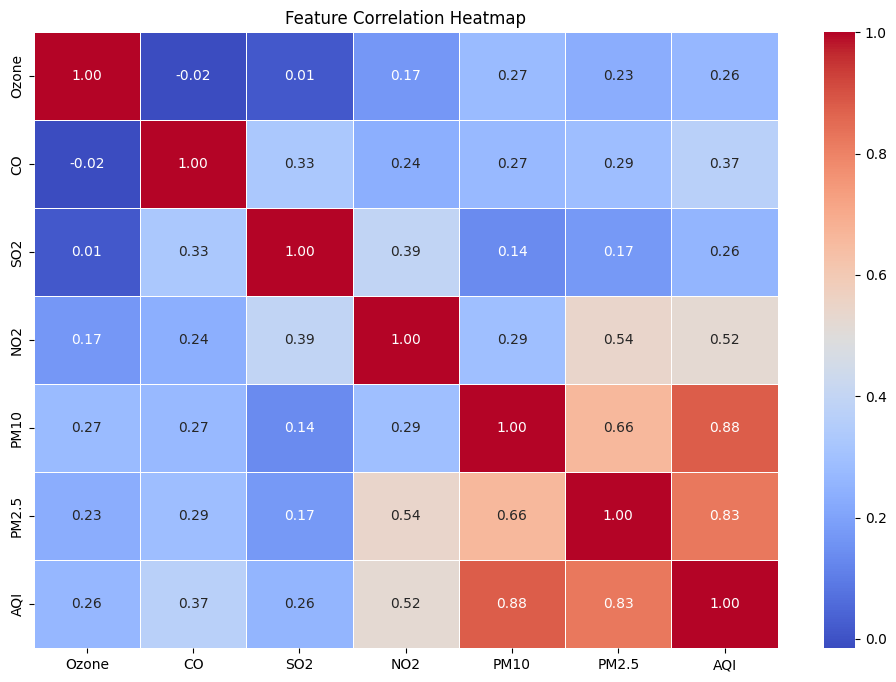

In [20]:
drop_columns = ['City', 'AQI Category', 'State', 'Station']
df = df.drop(columns=drop_columns)

# Define target and features
target = 'AQI'
features = [col for col in df.columns if col != target]

X = df[features]  # Features dataset
y = df[target]    # Target variable

# Select only numeric columns for correlation
num_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = num_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [21]:
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_26372/3167850597.py:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [26]:
data = pd.read_csv("Maharasthra.csv")
data

,From Date,To Date,Ozone,CO,SO2,NO2,PM10,PM2.5,State,City,Station,AQI,AQI Category
0,01-08-2021 00:00,02-08-2021 00:00,NaN,NaN,NaN,6.31,NaN,14.08,Maharashtra,Mumbai,"Powai, Mumbai - MPCB",23.0,Good
1,02-08-2021 00:00,03-08-2021 00:00,20.13,0.64,2.18,8.92,46.17,14.33,Maharashtra,Mumbai,"Powai, Mumbai - MPCB",46.0,Good
2,03-08-2021 00:00,04-08-2021 00:00,16.45,0.62,2.35,7.26,34.67,11.63,Maharashtra,Mumbai,"Powai, Mumbai - MPCB",35.0,Good
3,04-08-2021 00:00,05-08-2021 00:00,15.61,0.61,2.31,6.92,47.70,15.29,Maharashtra,Mumbai,"Powai, Mumbai - MPCB",48.0,Good
4,05-08-2021 00:00,06-08-2021 00:00,21.13,0.66,2.48,6.78,60.44,17.58,Maharashtra,Mumbai,"Powai, Mumbai - MPCB",60.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48175,27-07-2023 00:00,28-07-2023 00:00,2.51,0.17,0.87,5.03,13.05,6.91,Maharashtra,Navi Mumbai,"Sanpada, Navi Mumbai - MPCB",13.0,Good
48176,28-07-2023 00:00,29-07-2023 00:00,1.95,0.39,1.42,7.14,17.58,11.95,Maharashtra,Navi Mumbai,"Sanpada, Navi Mumbai - MPCB",20.0,Good
48177,29-07-2023 00:00,30-07-2023 00:00,1.36,0.30,1.10,6.17,30.82,15.54,Maharashtra,Navi Mumbai,"Sanpada, Navi Mumbai - MPCB",31.0,Good
48178,30-07-2023 00:00,31-07-2023 00:00,1.48,0.29,1.37,6.67,32.88,14.25,Maharashtra,Navi Mumbai,"Sanpada, Navi Mumbai - MPCB",33.0,Good


In [27]:
import pandas as pd
from pandas_profiling import ProfileReport # Or ydata_profiling

# --- 1. Load Data ---
# Use the file you need (either the original or the one with AQI)
data = pd.read_csv('Maharasthra.csv') 

# --- 2. CRITICAL FIX: Clean Column Names ---
# This removes any hidden spaces or special characters around column names
data.columns = data.columns.str.strip() 

# try:
#     data['From Date'] = pd.to_datetime(data['From Date'], format='%Y-%m-%d')
#     data.set_index('From Date', inplace=True)
# except KeyError:
#     print("Column 'From Date' not found after stripping whitespace. Check column names.")
    
profile = data.profile_report(title="EDA of Maharasthra", explorative=True)
profile.to_file(output_file="EDA_maharasthra.html")

print("The EDA_maharasthra.html report is being regenerated with clean column names and time series plots.")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:34<00:00,  2.64s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The EDA_maharasthra.html report is being regenerated with clean column names and time series plots.


In [24]:
print(city_day.columns.tolist())

['from_date', 'to_date', 'ozone', 'co', 'so2', 'no2', 'pm10', 'pm2.5', 'state', 'city', 'station', 'aqi', 'aqi_category', 'Particulate_Matter']


2025-10-16 17:21:07.445111: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-16 17:21:07.492690: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-16 17:21:08.970350: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.



--- Data Diagnostics for Maharasthra.csv ---
Dataset Shape: (48180, 13)
Missing values per column:
 From Date           0
To Date             0
Ozone           31292
CO              30249
SO2             30097
NO2             29930
PM10            30207
PM2.5           30743
State               0
City                0
Station             0
AQI             29387
AQI Category    29387
dtype: int64
AQI Descriptive Statistics:
count    18793.000000
mean       113.967754
std         79.210243
min          0.000000
25%         57.000000
50%         94.000000
75%        148.000000
max        500.000000
Name: AQI, dtype: float64
-------------------------------------------



2025-10-16 17:21:13.706842: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Training Linear Regression...
Training Random Forest...
Training XGBoost...
Training CatBoost...
Training CNN-LSTM...
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training Bi-RNN...
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

--- Model Evaluation Results ---
               Model     MSE    RMSE     MAE      R2
1      Random Forest  0.4324  0.6576  0.0344  0.9983
2            XGBoost  0.6721  0.8198  0.2144  0.9974
5             Bi-RNN  0.9360  0.9675  0.4186  0.9963
4           CNN-LSTM  1.1085  1.0529  0.6943  0.9957
3           CatBoost  1.5086  1.2282  0.5606  0.9941
0  Linear Regression  7.5181  2.7419  0.3162  0.9706


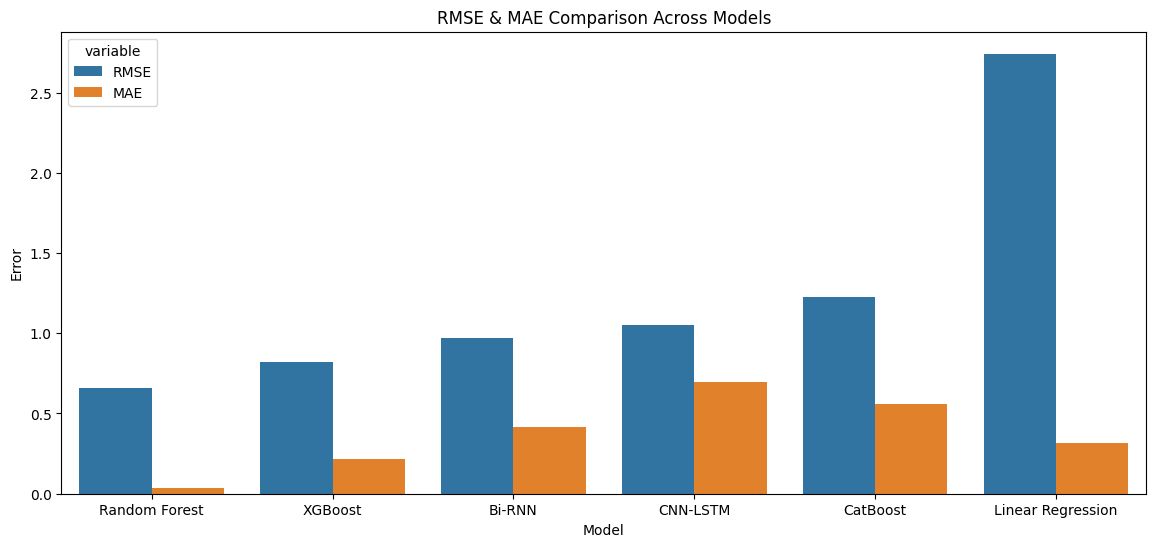

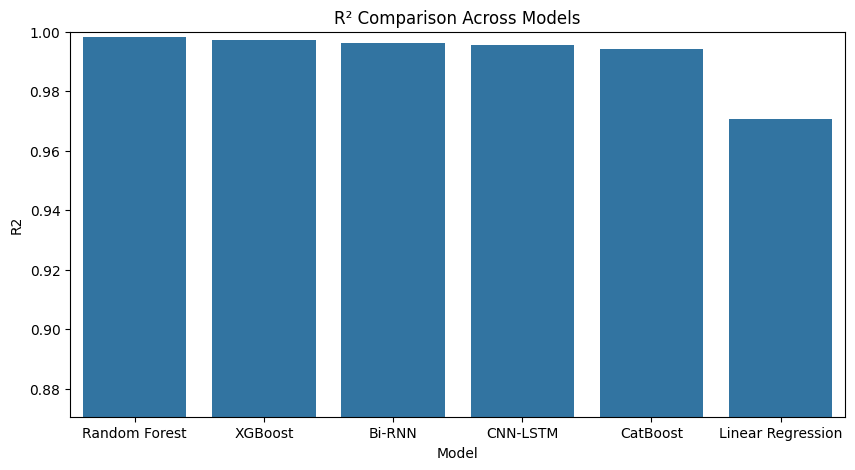


Best Model: Random Forest
R²: 0.9983, RMSE: 0.66, MAE: 0.03


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import catboost as cb
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Conv1D, MaxPooling1D, Flatten

# Set a random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ---------------------------
# 1. Load Dataset
# ---------------------------
df = pd.read_csv('Maharasthra.csv')

# --- DIAGNOSTIC: Check Data Characteristics ---
print("\n--- Data Diagnostics for Maharasthra.csv ---")
print(f"Dataset Shape: {df.shape}")
print("Missing values per column:\n", df.isnull().sum())
print(f"AQI Descriptive Statistics:\n{df['AQI'].describe()}")
print("-------------------------------------------\n")

# ---------------------------
# 2. Prepare Features & Target
# ---------------------------
features = ['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']
target = 'AQI'

X = df[features]
y = df[target]

# ---------------------------
# 3. Train-Test Split (Non-Shuffled for Time-Series)
# ---------------------------
# Using shuffle=False to maintain the time order for a proper time-series validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False 
)

# ---------------------------
# 3b. Correct Missing Value Imputation (Based on TRAIN set only)
# ---------------------------
# Impute missing values using the mean of the training set
train_mean_X = X_train.mean()
train_mean_y = y_train.mean()

X_train = X_train.fillna(train_mean_X)
X_test = X_test.fillna(train_mean_X) # Use train mean on test set (No Leakage)

y_train = y_train.fillna(train_mean_y)
y_test = y_test.fillna(train_mean_y) # Use train mean on test set (No Leakage)

# ---------------------------
# 3c. Correct Way to Add Gaussian Noise (Data Augmentation)
# FIX: Noise factor set to 0.00 to disable noise, as it can hurt small/noisy datasets
# ---------------------------
noise_factor = 0.00 # Changed from 0.03
noise = noise_factor * X_train.std().values * np.random.randn(*X_train.shape)
X_train_noisy = X_train + noise

# ---------------------------
# 4. Feature Scaling
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_noisy)
X_test_scaled = scaler.transform(X_test)

# Reshape data for RNN/LSTM/CNN-LSTM models (requires 3D: [samples, timesteps, features])
TIMESTEPS = 1
FEATURES = X_train_scaled.shape[1]

X_train_3d = X_train_scaled.reshape(X_train_scaled.shape[0], TIMESTEPS, FEATURES)
X_test_3d = X_test_scaled.reshape(X_test_scaled.shape[0], TIMESTEPS, FEATURES)

# ---------------------------
# 5. Initialize Models
# ---------------------------

# Helper function to create the Keras models
def create_cnn_lstm_model(input_shape):
    model = Sequential([
        # CNN component (expects 3D data)
        Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=1),
        # LSTM component
        LSTM(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def create_bi_rnn_model(input_shape):
    model = Sequential([
        # Bidirectional wrapper allows the network to learn features from both past and future
        Bidirectional(LSTM(50, activation='relu'), input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Initialize all models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1),
    "CatBoost": cb.CatBoostRegressor(iterations=100, learning_rate=0.1, random_state=42, verbose=0),
    "CNN-LSTM": create_cnn_lstm_model((TIMESTEPS, FEATURES)),
    "Bi-RNN": create_bi_rnn_model((TIMESTEPS, FEATURES))
}

# ---------------------------
# 6. Train, Predict & Evaluate
# ---------------------------
results = []
# FIX: Increased epochs for deep learning models to give them a proper chance to converge
epochs = 100 

for name, model in models.items():
    print(f"Training {name}...")
    
    # Train Keras models using 3D data and epochs
    if name in ["CNN-LSTM", "Bi-RNN"]:
        # Added a callback to stop training early if loss doesn't improve (optional but good practice)
        callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True, verbose=0)
        
        model.fit(X_train_3d, y_train, epochs=epochs, batch_size=32, verbose=0, callbacks=[callback])
        y_pred = model.predict(X_test_3d).flatten()
    
    # Train traditional Scikit-learn/Boost models using 2D data
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })
    
results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
print("\n--- Model Evaluation Results ---")
print(results_df.round(4))

# ---------------------------
# 7. Visual Comparison
# ---------------------------
plt.figure(figsize=(14,6))
sns.barplot(data=results_df.melt(id_vars='Model', value_vars=['RMSE', 'MAE']),
            x='Model', y='value', hue='variable')
plt.title('RMSE & MAE Comparison Across Models')
plt.ylabel('Error')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x='Model', y='R2')
plt.title('R² Comparison Across Models')
# Adjusted ylim to accommodate potential negative R2 if performance is still poor
plt.ylim(max(results_df['R2'].min() - 0.1, -2), 1) 
plt.show()

# ---------------------------
# 8. Model Recommendation
# ---------------------------
best_model = results_df.iloc[0]
print(f"\nBest Model: {best_model['Model']}")
print(f"R²: {best_model['R2']:.4f}, RMSE: {best_model['RMSE']:.2f}, MAE: {best_model['MAE']:.2f}")